In [1]:
from thesis import METRICS_PATH
import pandas as pd
metrics_path = METRICS_PATH
METRICS_DF = pd.read_csv(metrics_path)

In [29]:
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

MODELS = ['ButterflyPipeline', 'ScPreGanPipeline', 'ScGenPipeline']
METRICS = ['DEGs', 'r2mean', 'r2mean_top20_boostrap_mean', 'r2mean_top100_boostrap_mean']

METRICS1 = ['DEGs', 'r2mean', 'r2mean_top20_boostrap_mean', 'r2mean_top100_boostrap_mean']
METRICS2 = ['edistance', 'wasserstein', 'euclidean', 'mean_pairwise', 'mmd']

color_maps_no_transparent = {
    'ButterflyPipeline': "Blues",
    'ScPreGanPipeline': "Oranges",
    'ScGenPipeline': "Greens"
}


def get_transparent_cmap(base_cmap, alpha=0.5):
    base = plt.get_cmap(base_cmap)
    cmap = base(np.arange(base.N))
    cmap[:, -1] = alpha  # Set the alpha channel
    return ListedColormap(cmap)

color_maps = {
    'ButterflyPipeline': get_transparent_cmap('Blues', alpha=0.7),
    'ScPreGanPipeline': get_transparent_cmap('Oranges', alpha=0.7),
    'ScGenPipeline': get_transparent_cmap('Greens', alpha=0.7)
}


In [3]:
METRICS_DF


model        dataset  experiment_name perturbation  dose  \
0       ScGenPipeline  NaultPipeline              NaN         tcdd  0.01   
1       ScGenPipeline  NaultPipeline              NaN         tcdd  0.03   
2       ScGenPipeline  NaultPipeline              NaN         tcdd  0.03   
3       ScGenPipeline  NaultPipeline              NaN         tcdd  0.01   
4       ScGenPipeline  NaultPipeline              NaN         tcdd  0.01   
..                ...            ...              ...          ...   ...   
259  ScPreGanPipeline  NaultPipeline              NaN         tcdd  3.00   
260  ScPreGanPipeline  NaultPipeline              NaN         tcdd  0.03   
261  ScPreGanPipeline  NaultPipeline              NaN         tcdd  0.01   
262  ScPreGanPipeline  NaultPipeline              NaN         tcdd  0.01   
263  ScPreGanPipeline  NaultPipeline              NaN         tcdd  0.03   

     DEGs  r2mean  r2mean_top20  r2mean_top100  r2mean_top20_boostrap_mean  \
0       3   0.889         0.956          0.974                    0.814537   
1       0   0.980         0.992          0.994                    0.993515   
2       0   0.982         0.972          0.978                    0.976747   
3       1   0.819         0.880          0.769                    0.726875   
4       0   0.978         0.978          0.980                    0.974846   
..    ...     ...           ...            ...                         ...   
259    41   0.835         0.835          0.899                    0.895772   
260    11   0.293         0.163          0.093                    0.031916   
261     4   0.560         0.543          0.699                    0.348068   
262     9   0.368         0.408          0.429                    0.367041   
263     9   0.870         0.882          0.904                    0.897192   

     ...         cell_type_test average_mean_expressed_diff  \
0    ...            Neutrophils                    0.732890   
1    ...             Macrophage                    0.932120   
2    ...  Hepatocytes - central                    0.890597   
3    ...              Subtype 1                    0.853781   
4    ...      Endothelial Cells                    0.902796   
..   ...                    ...                         ...   
259  ...   Hepatocytes - portal                    0.700268   
260  ...         Cholangiocytes                    0.753432   
261  ...                B Cells                    0.689369   
262  ...     Portal Fibroblasts                    0.732641   
263  ...             Macrophage                    0.806313   

     average_fractions_diff  average_mean_degs20_diff  \
0                  0.731681                  0.621025   
1                  0.718233                  0.455769   
2                  0.694578                  0.389083   
3                  0.679459                  0.745988   
4                  0.716499                  0.524744   
..                      ...                       ...   
259                0.083768                  0.250741   
260                0.202994                  0.824889   
261                0.115299                  0.553023   
262                0.128290                  0.567249   
263                0.133137                  0.313268   

     average_mean_degs100_diff  edistance  wasserstein  euclidean  \
0                     0.719037   3.389077     1.079832   1.840944   
1                     0.763630   1.026555     1.295581   1.013190   
2                     0.485574   0.993029     1.027043   0.996509   
3                     0.819951  23.156135     1.848287   4.812082   
4                     0.613443   2.726755     1.116481   1.651289   
..                         ...        ...          ...        ...   
259                   0.354249   0.510030     0.657225   0.714164   
260                   0.716519   0.999282     0.951062   0.999641   
261                   0.687827   1.076738     1.057798   1.037660   
262                   0.645712   0

In [4]:
scgen = METRICS_DF[METRICS_DF['model'] == 'ScGenPipeline']
scgen = scgen[scgen['dataset'] == 'NaultPipeline']
scgen = scgen[scgen['dose'] == 0.01].sort_values('cell_type_test')
#scgen = scgen[scgen['dose'] == 0.1]
scgen
print(scgen['cell_type_test'].to_list())
#print(scgen['dose'].to_list())

['B Cells', 'Cholangiocytes', 'Endothelial Cells', 'Hepatocytes - central', 'Hepatocytes - portal', 'Macrophage', 'Neutrophils', 'Portal Fibroblasts', 'Stellate Cells', 'Subtype 1', 'T Cells']


## 2d metrics per cell type and per batch

In [5]:
from typing import Optional
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
from typing import List
from enum import Enum


def _plot_2d_metrics(dataset: DataFrame, title: str, x_labels: List[str], metrics: List[str] = ['DEGs', 'r2mean', 'r2mean_top20_boostrap_mean', 'r2mean_top100_boostrap_mean']):    
    x = np.arange(len(x_labels))
    width = 0.2

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()

    for i, metric in enumerate(metrics):
        ax = axes[i]

        start = - (len(MODELS) // 2) 
        start = start if len(MODELS) % 2 != 0 else start - 1
        end = len(MODELS) // 2
        x_bars = [x + i*width for i in range(start,end+1,1 )]
        for model, x_bar in zip(MODELS, x_bars):
            ax.bar(x_bar, dataset[dataset['model'] == model][metric], width, label=model, alpha=0.7)

        ax.set_xticks(x)
        ax.set_xticklabels(x_labels, rotation=45, ha='right')
        ax.set_ylabel(metric)
        #ax.set_title(f"Comparison of {metric}")

    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3)
    fig.suptitle(title)

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space at the top for the legend
    plt.show()
        
    
    ## add distance metrics
    

def plot_2d_metrics_per_dosage(dataset_pipeline: str, title: str, cell_type: str, perturbation: Optional[str] = None):
    dataset = METRICS_DF[METRICS_DF['dataset'] == dataset_pipeline]
    dataset = dataset[dataset['cell_type_test'] == cell_type].sort_values('dose')
    dosages = sorted(dataset['dose'].unique().tolist()) #dataset['dose'].unique().tolist()
    assert len(dosages) > 1
    _plot_2d_metrics(dataset=dataset, title=title, x_labels=dosages)
    


def plot_2d_metrics_per_cell_type(dataset_pipeline: str, title: str, dosage: Optional[float] = None, perturbation: Optional[str] = None):
    dataset = METRICS_DF[METRICS_DF['dataset'] == dataset_pipeline]
    if dosage is not None:
        dataset = dataset[dataset['dose'] == dosage]
    if perturbation is not None:
        dataset = dataset[dataset['perturbation'] == perturbation]
        
    dataset = dataset.sort_values('cell_type_test')
    cell_types = sorted(dataset['cell_type_test'].unique().tolist())
    _plot_2d_metrics(dataset=dataset, title=title, x_labels=cell_types)


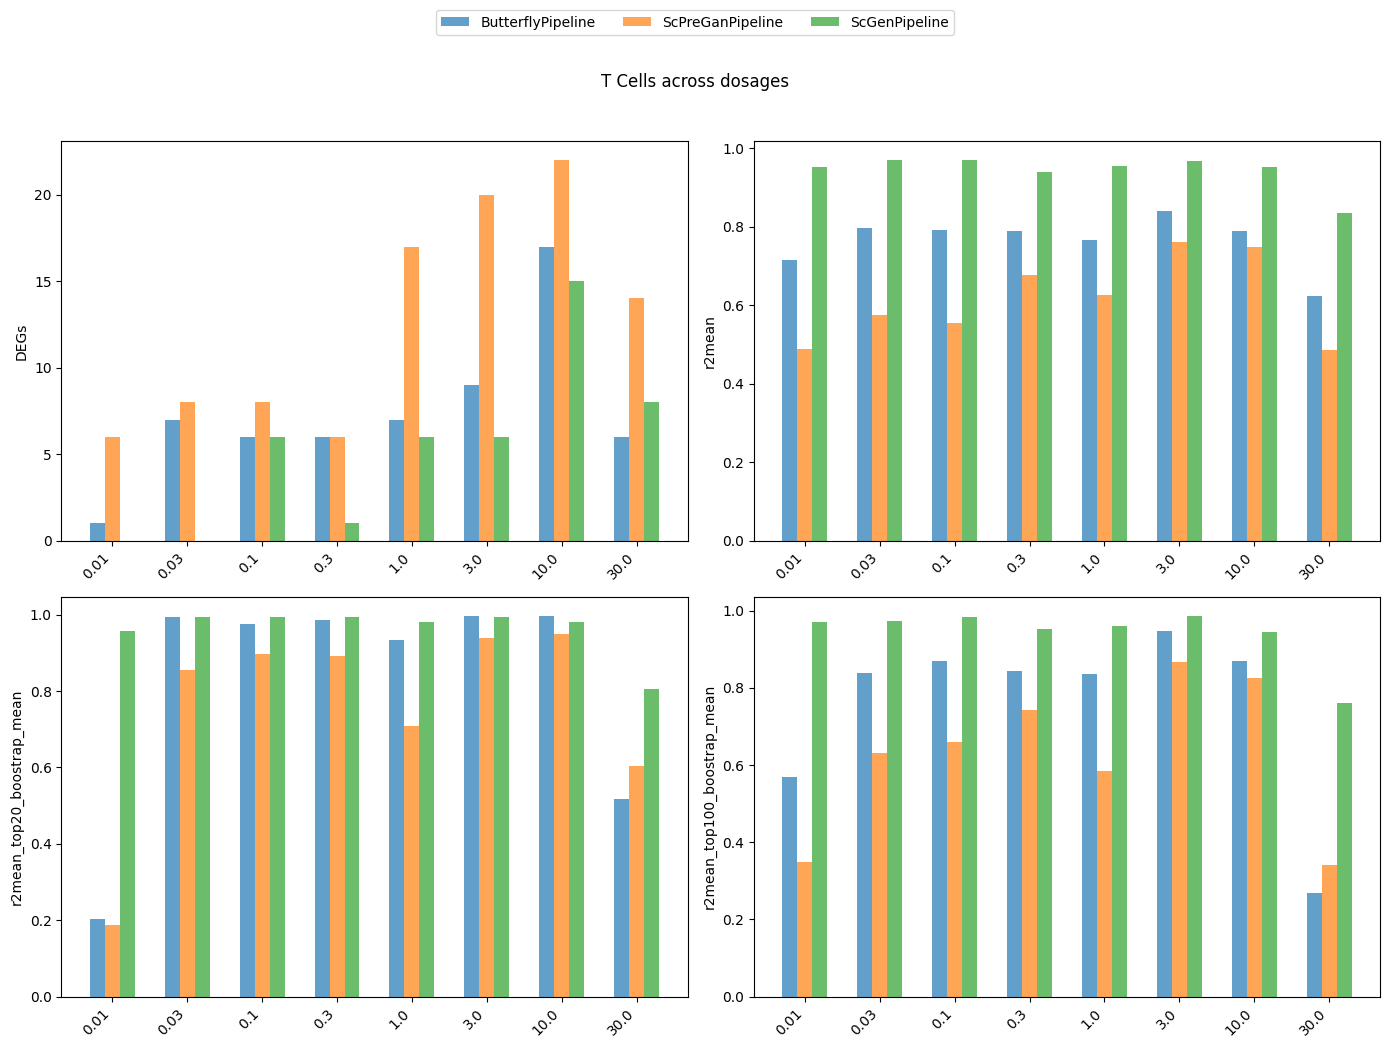

In [6]:
plot_2d_metrics_per_dosage(dataset_pipeline='NaultPipeline', cell_type='T Cells', title='T Cells across dosages')

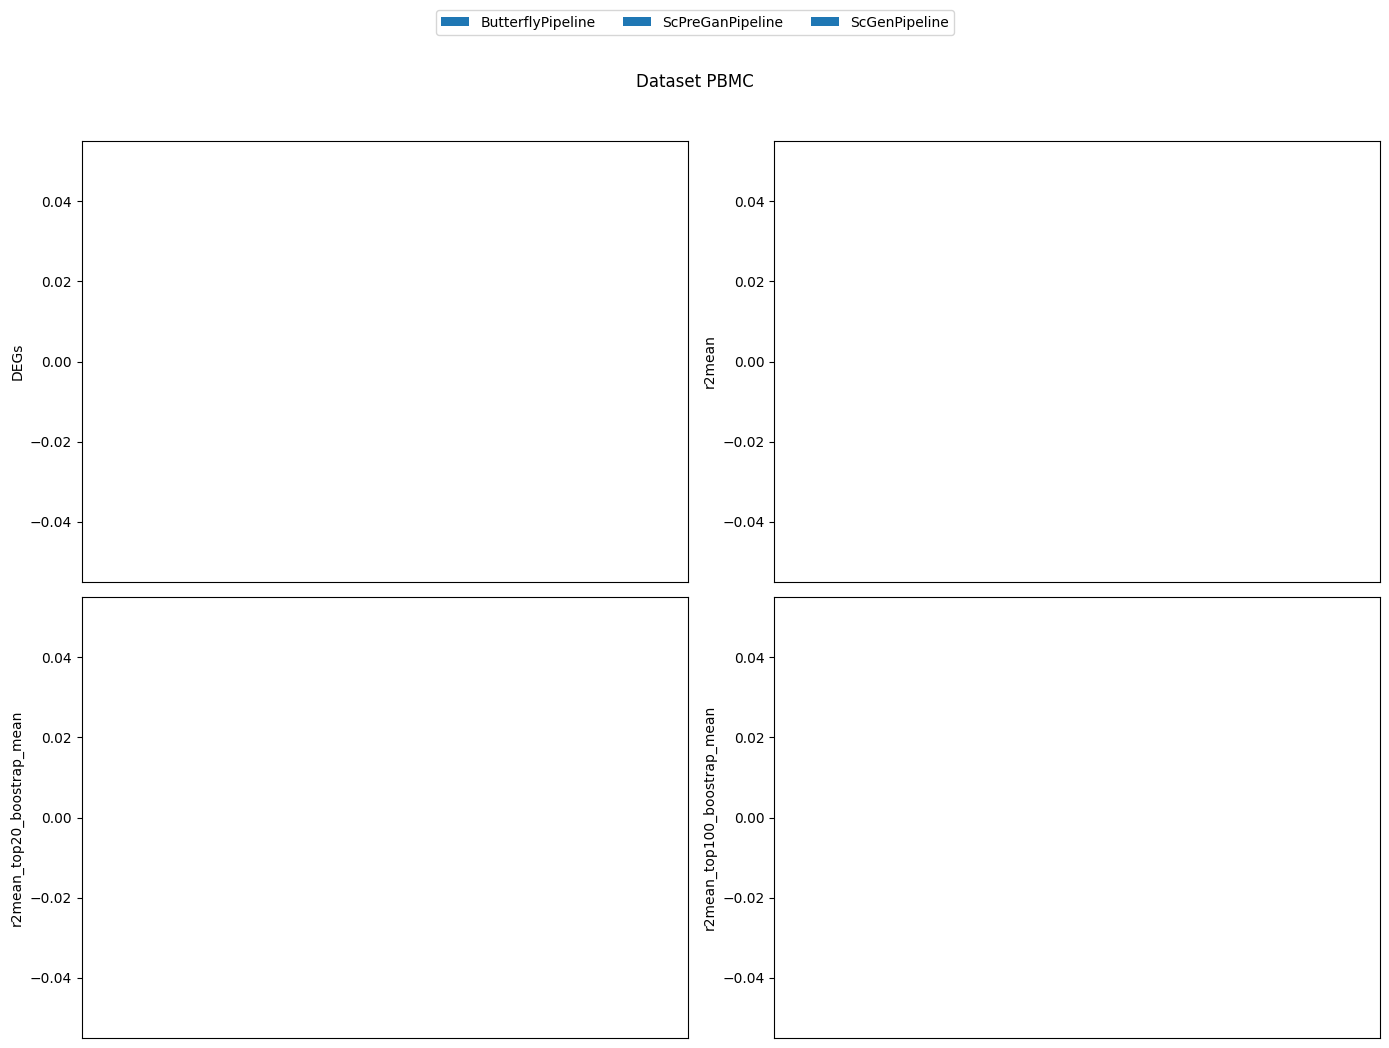

In [7]:

plot_2d_metrics_per_cell_type(dataset_pipeline='PbmcPipeline', title='Dataset PBMC')

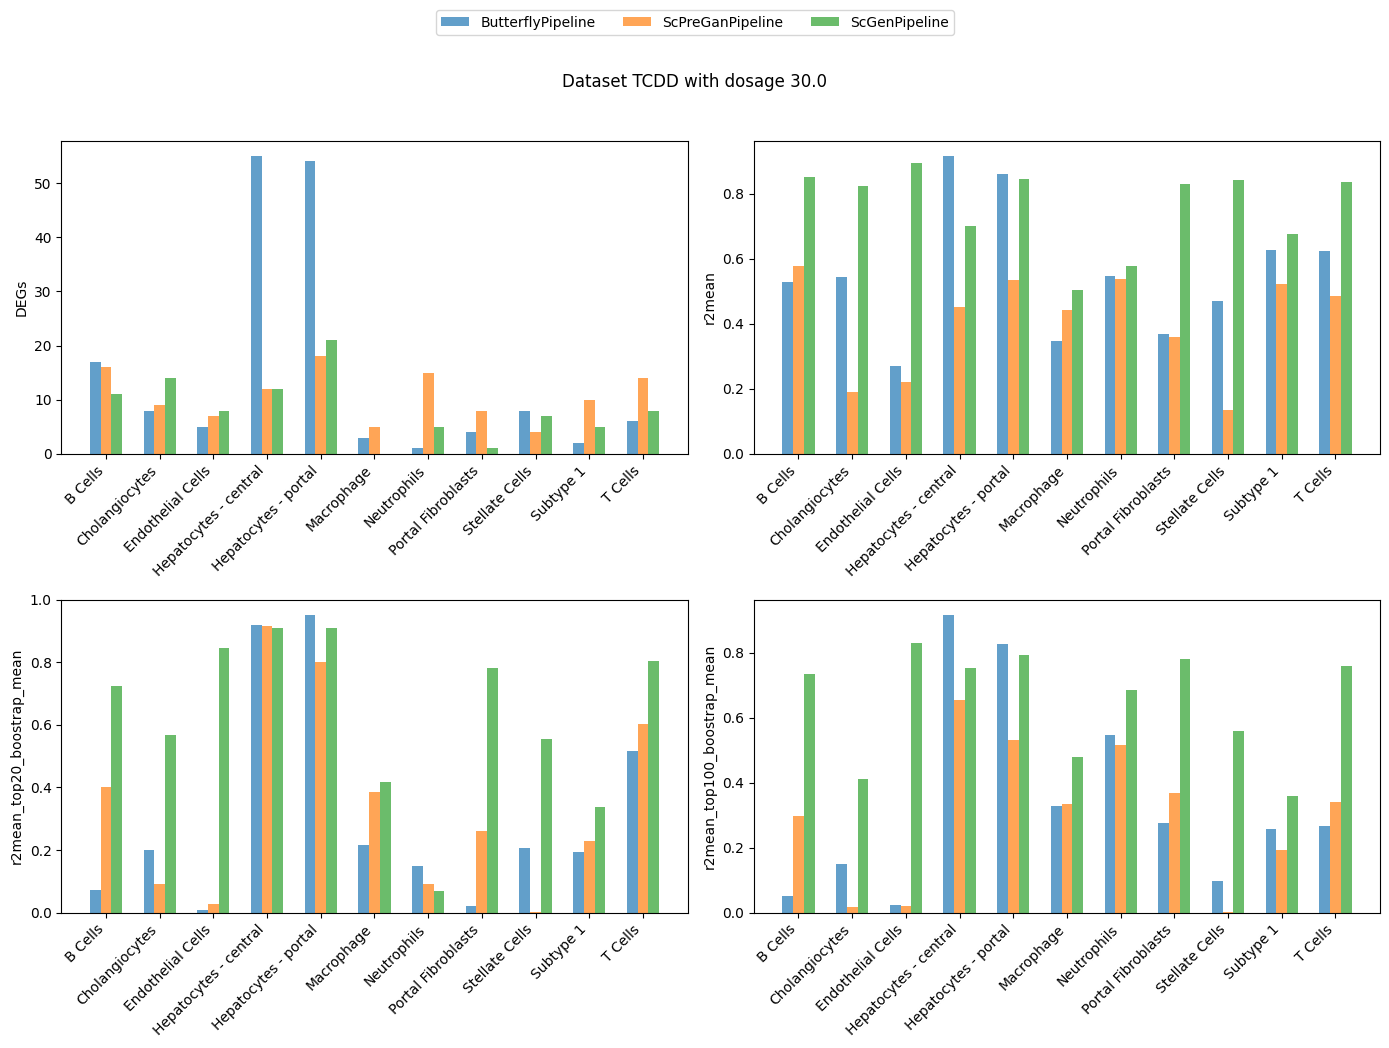

In [8]:
plot_2d_metrics_per_cell_type(dataset_pipeline="NaultPipeline", dosage=30.0, title='Dataset TCDD with dosage 30.0')


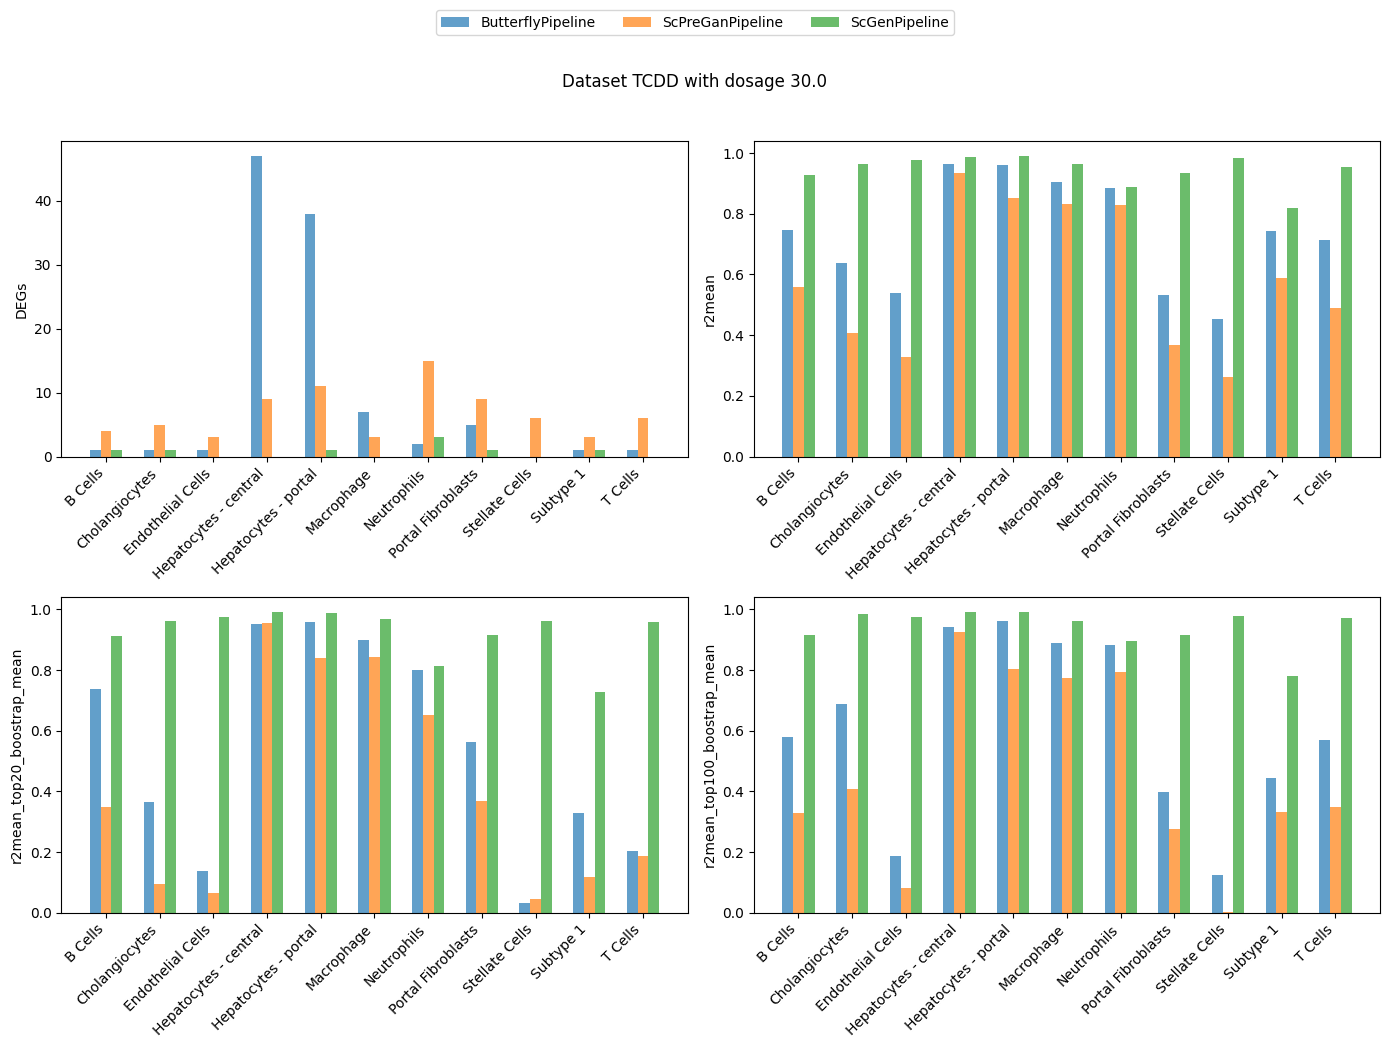

In [9]:
plot_2d_metrics_per_cell_type(dataset_pipeline="NaultPipeline", dosage=0.01, title='Dataset TCDD with dosage 30.0')


## 2d plots reducing across cell types or dosages

In [35]:
from enum import Enum
from typing import List
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


class PlotType(Enum):
    Violin = 0
    Boxplot = 1


class DimToReduce(Enum):
    X = 0
    Y = 1


def get_plot(
    dataset_name: str,
    x_key: str,
    y_key: str,
    title: str,
    dim_to_reduce: DimToReduce,
    plot_type=PlotType.Violin,
    metrics: List[str] = [
        "DEGs",
        "r2mean",
        "r2mean_top20_boostrap_mean",
        "r2mean_top100_boostrap_mean",
    ],
):
    dataset = METRICS_DF[METRICS_DF["dataset"] == dataset_name].sort_values(
        by=[x_key, y_key]
    )
    x_labels = sorted(dataset[x_key].unique().tolist())
    y_labels = sorted(dataset[y_key].unique().tolist())

    x = np.arange(len(x_labels))
    y = np.arange(len(y_labels))
    width = 0.2
    
    nrows = int(np.ceil(len(metrics) / 2))

    fig, axes = plt.subplots(nrows, 2, figsize=(14, 10))
    axes = axes.flatten()

    x_labels = x_labels if dim_to_reduce == DimToReduce.Y else y_labels
    x = x if dim_to_reduce == DimToReduce.Y else y
    x_key = x_key if dim_to_reduce == DimToReduce.Y else y_key
    
    def _plot(ax, metric):
        start = -(len(MODELS) // 2)
        start = start if len(MODELS) % 2 != 0 else start - 1
        end = len(MODELS) // 2
        x_bars = [x + i * width for i in range(start, end + 1, 1)]
        for model_index, (model, x_bar) in enumerate(zip(MODELS, x_bars)):
            dataset_model = dataset[dataset["model"] == model]

            plot_data = []
            for x_label in x_labels:
                plot_data.append(
                    dataset_model[dataset_model[x_key] == x_label][metric].values.tolist()
                )

            if plot_type == PlotType.Violin:
                ax.violinplot(
                    dataset=plot_data,
                    positions=x_bar,
                    widths=width,
                    vert=True,
                    showmedians=True,
                )
            elif plot_type == PlotType.Boxplot:
                ax.boxplot(
                    plot_data,
                    positions=x_bar,
                    widths=width,
                    patch_artist=True,
                    boxprops=dict(facecolor=f"C{model_index}", color="black"),
                    medianprops=dict(color="black"),
                )
            else: 
                raise NotImplementedError

    for ax, metric in zip(axes, metrics):
        _plot(ax, metric)

        ax.set_xticks(x)
        ax.set_xticklabels(x_labels, rotation=45, ha="right")
        ax.set_ylabel(metric)
        
    if len(metrics) % 2 != 0:
        fig.delaxes(axes[-1])

    # Create custom legend handles
    legend_handles = [mpatches.Patch(color=f"C{i}", label=model) for i, model in enumerate(MODELS)]
    
    # Add custom legend
    fig.legend(legend_handles, [model for model in MODELS], loc="upper center", bbox_to_anchor=(0.5, 1.05), ncol=3)
    fig.suptitle(title)

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space at the top for the legend
    plt.show()


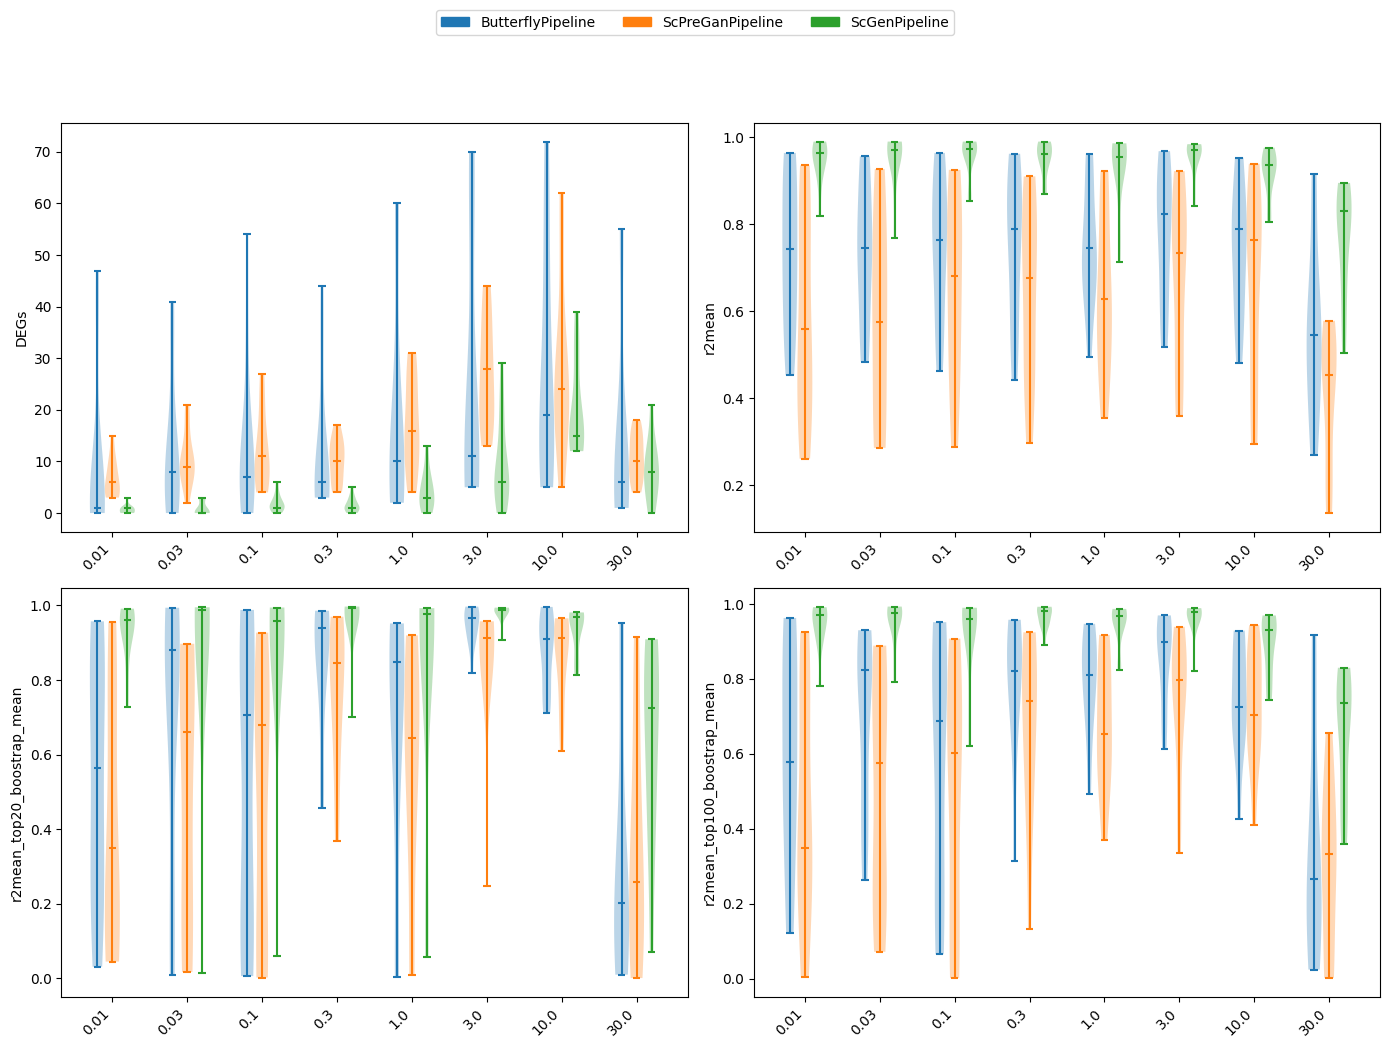

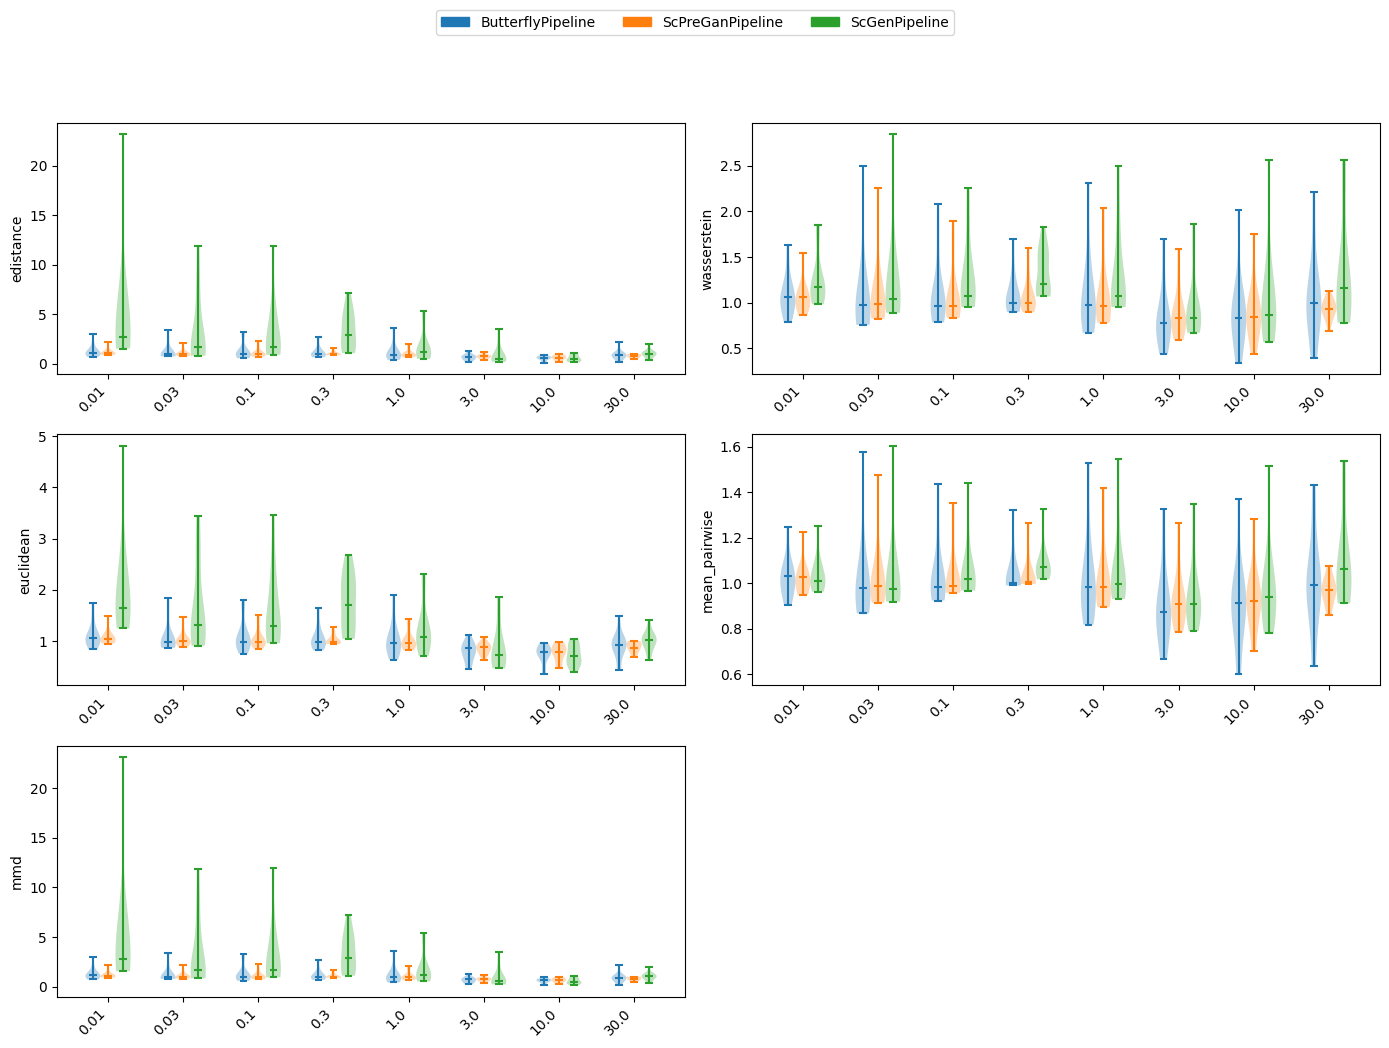

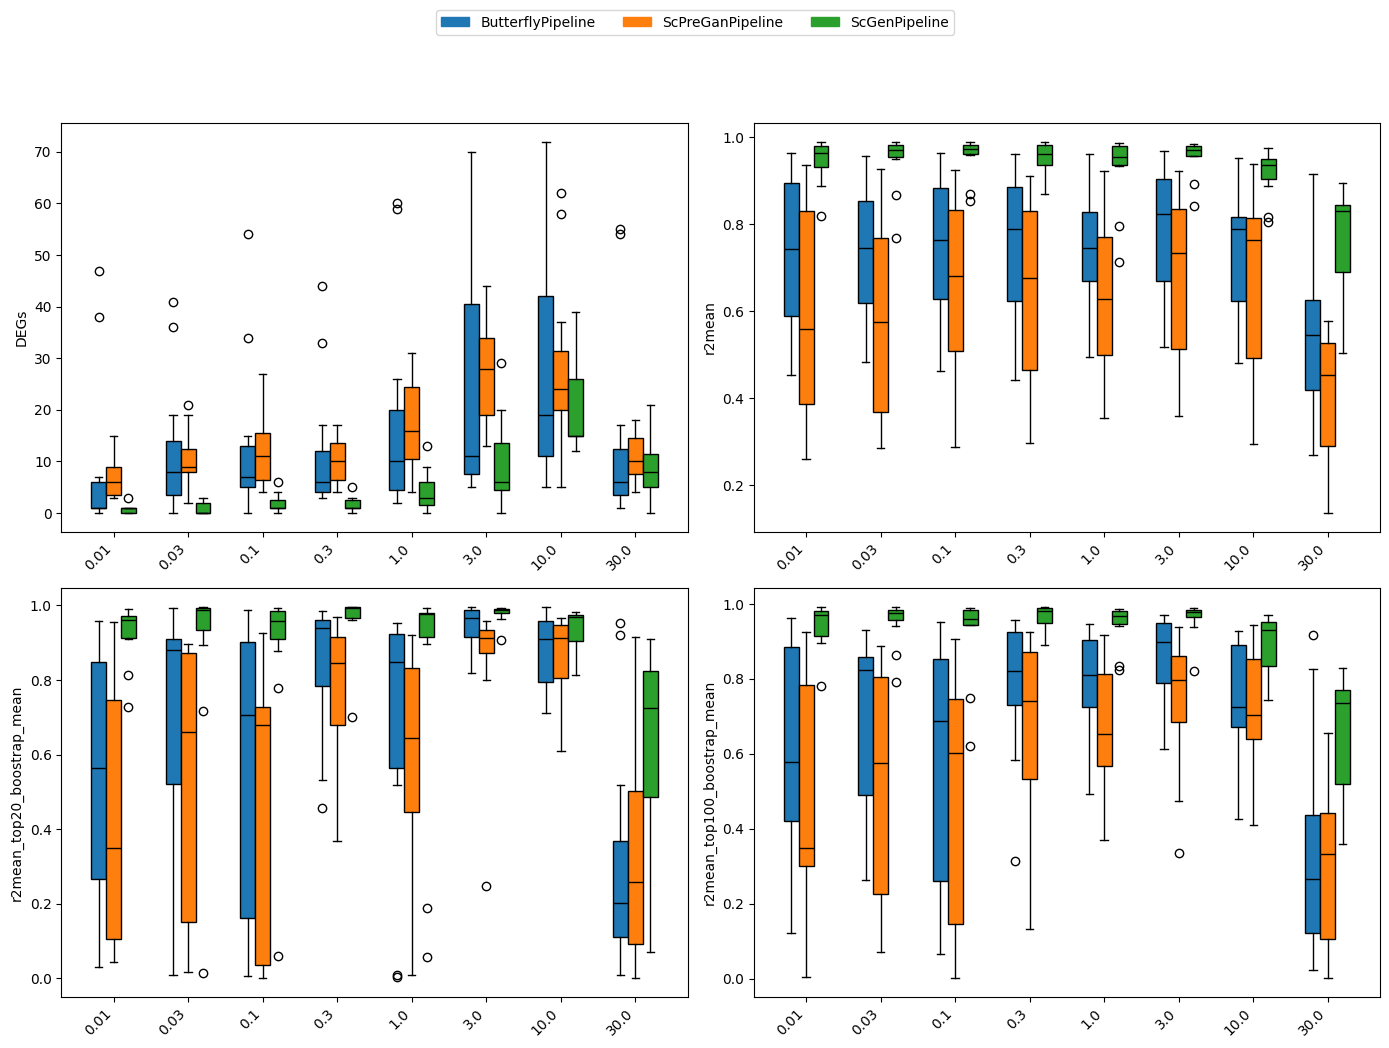

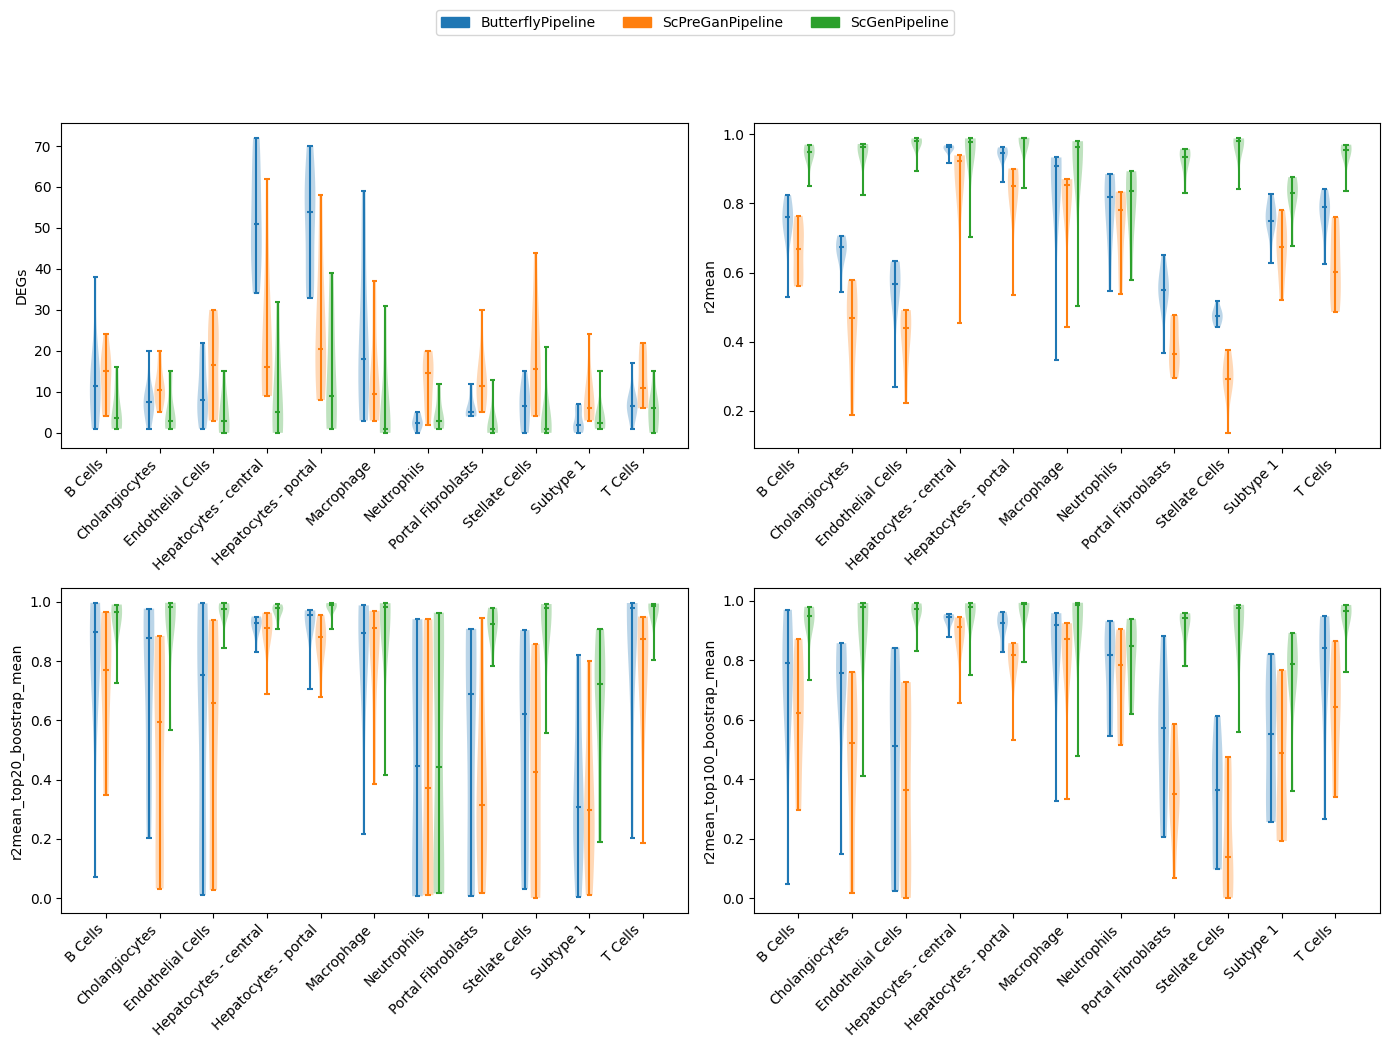

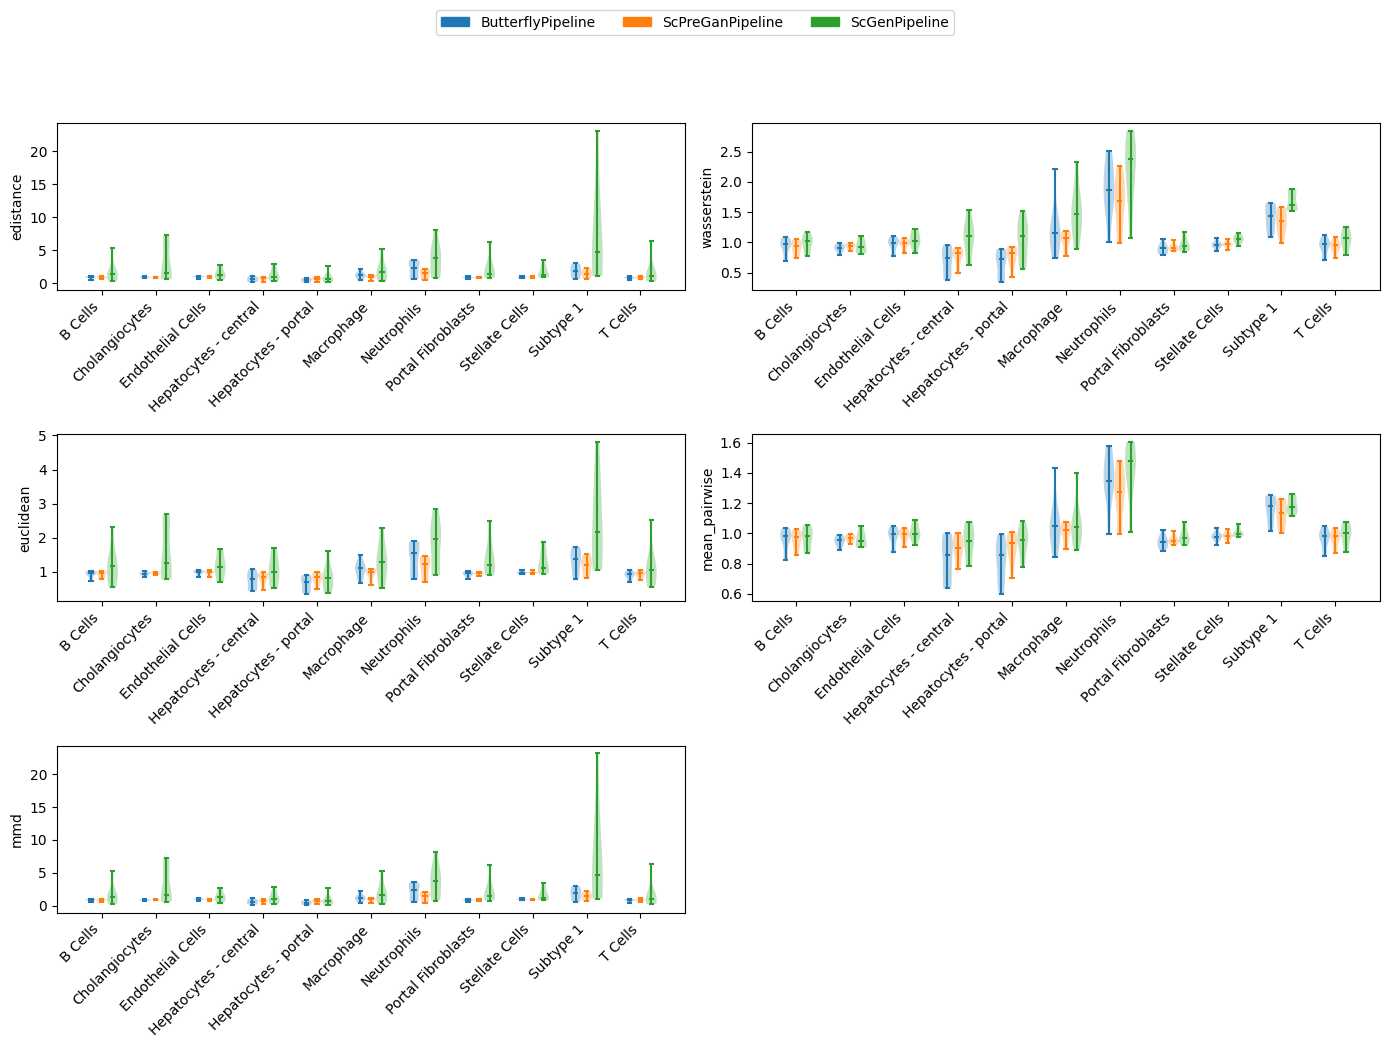

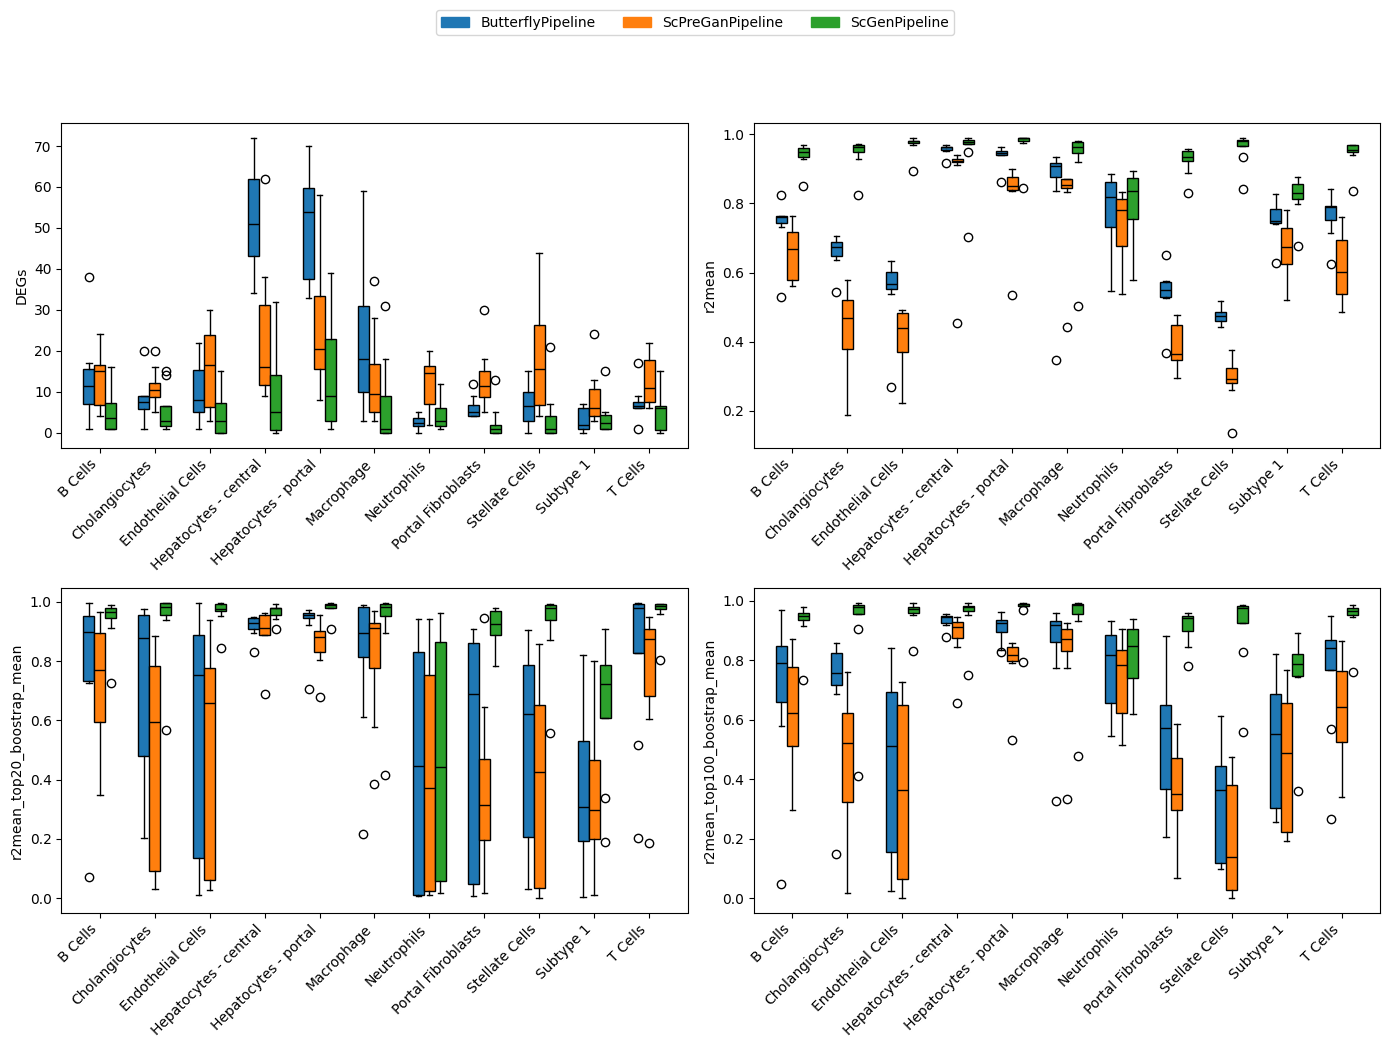

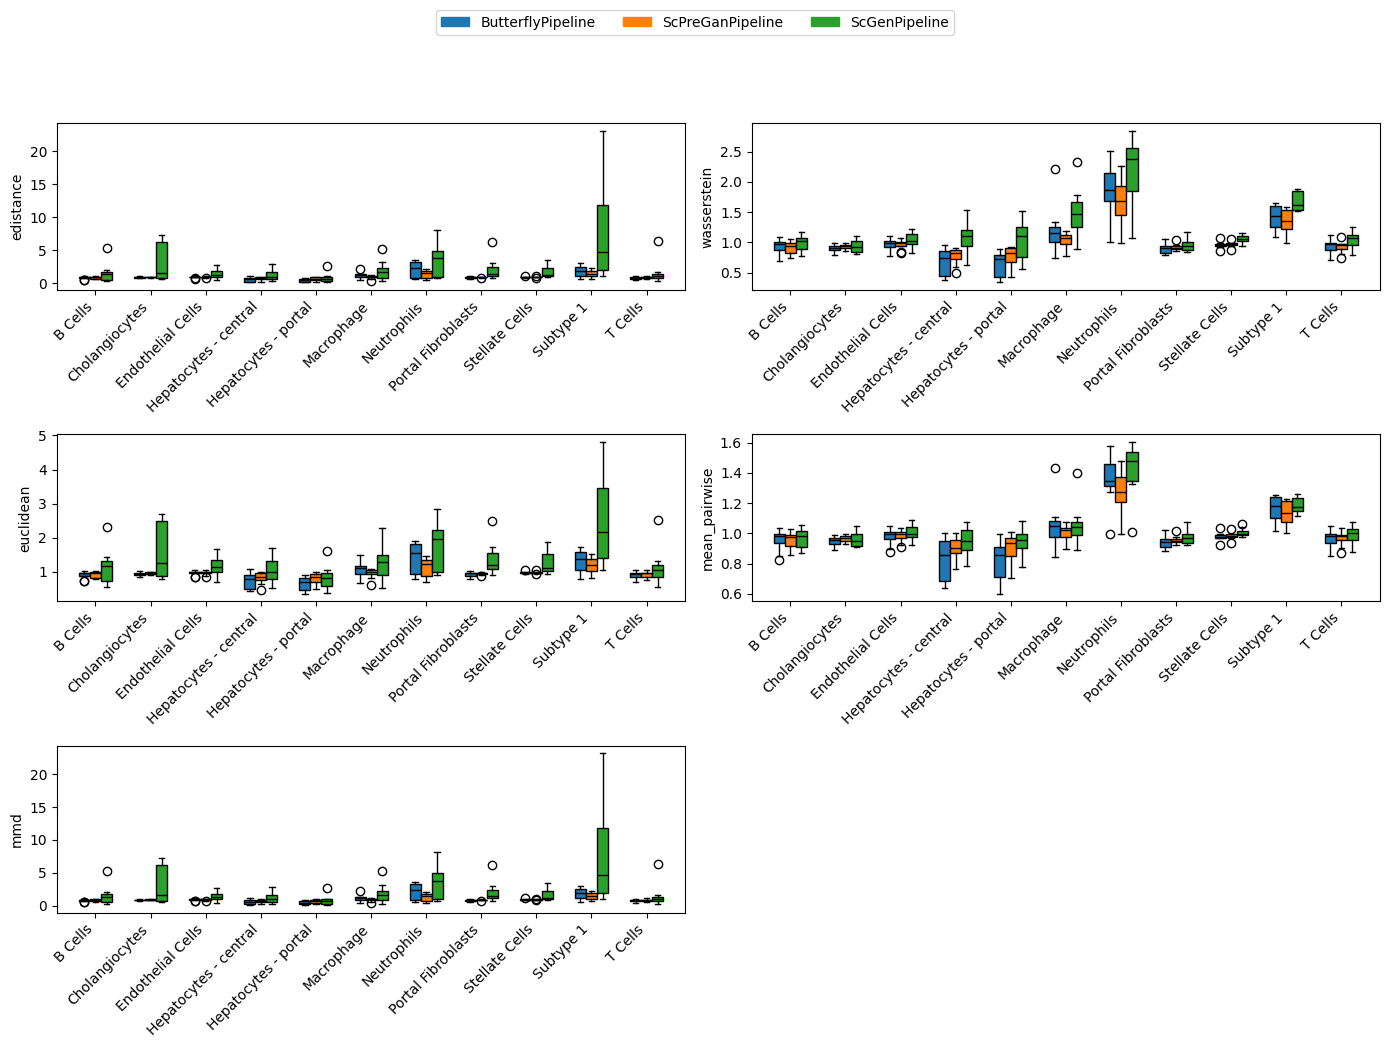

In [36]:
dim_to_reduce = [DimToReduce.X, DimToReduce.Y]
plots = [PlotType.Violin, PlotType.Boxplot]
metrics = [METRICS1, METRICS2]
for dim in dim_to_reduce:
    for plot in plots:
        for metric in metrics:
            get_plot(
                dataset_name="NaultPipeline",
                x_key="cell_type_test",
                y_key="dose",
                dim_to_reduce=dim,
                plot_type=plot,
                title="",
                metrics=metric
            )

## 3d plots

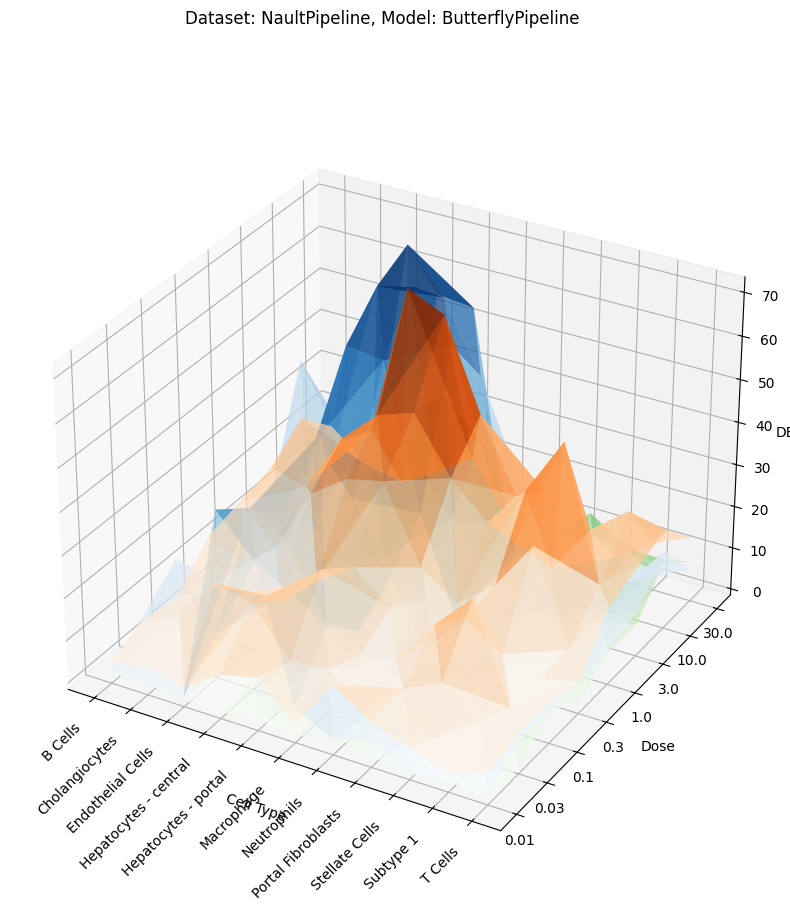

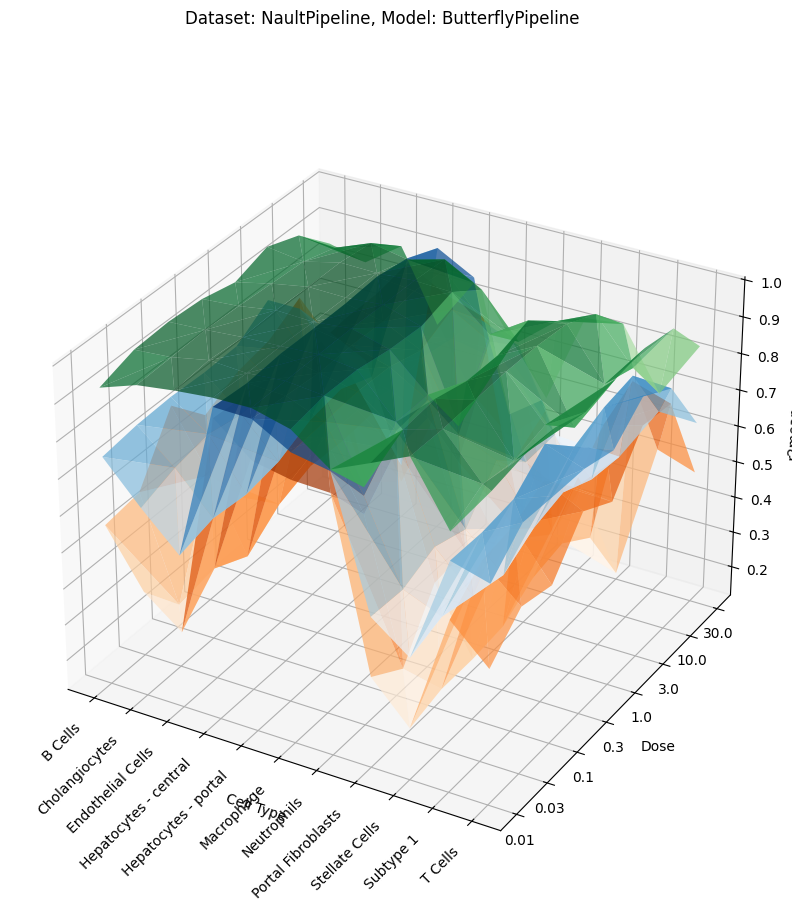

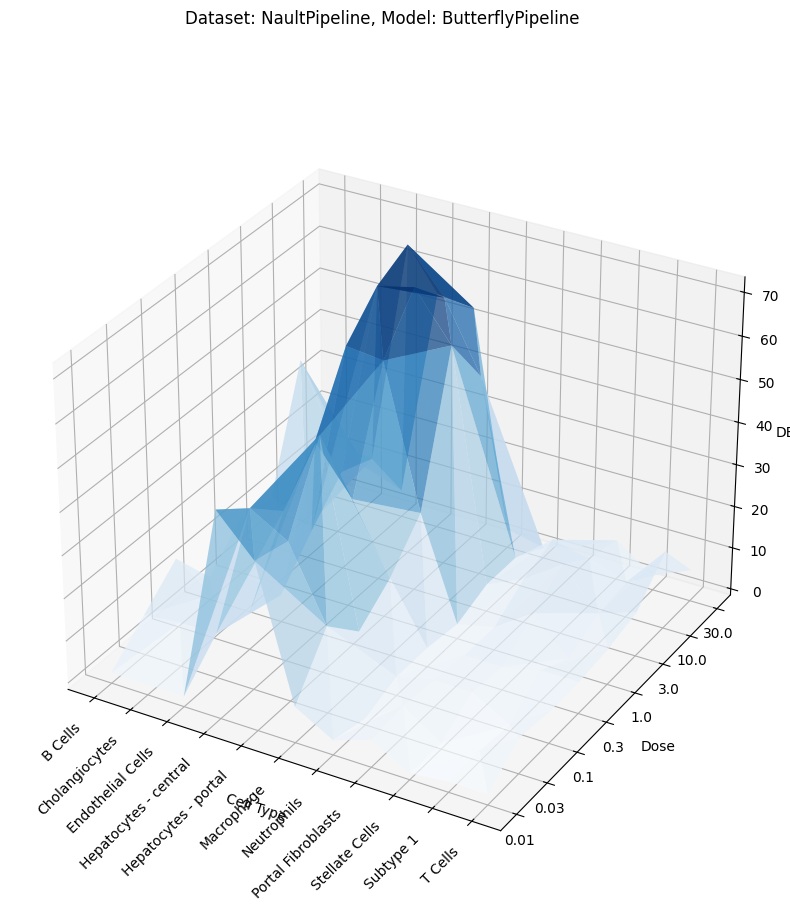

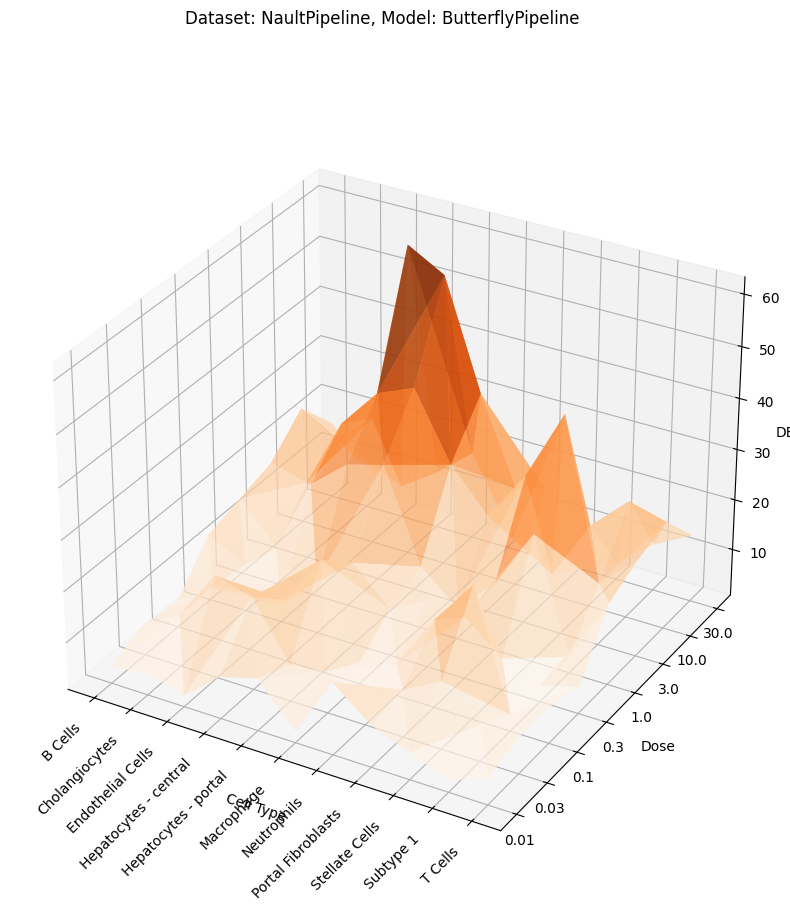

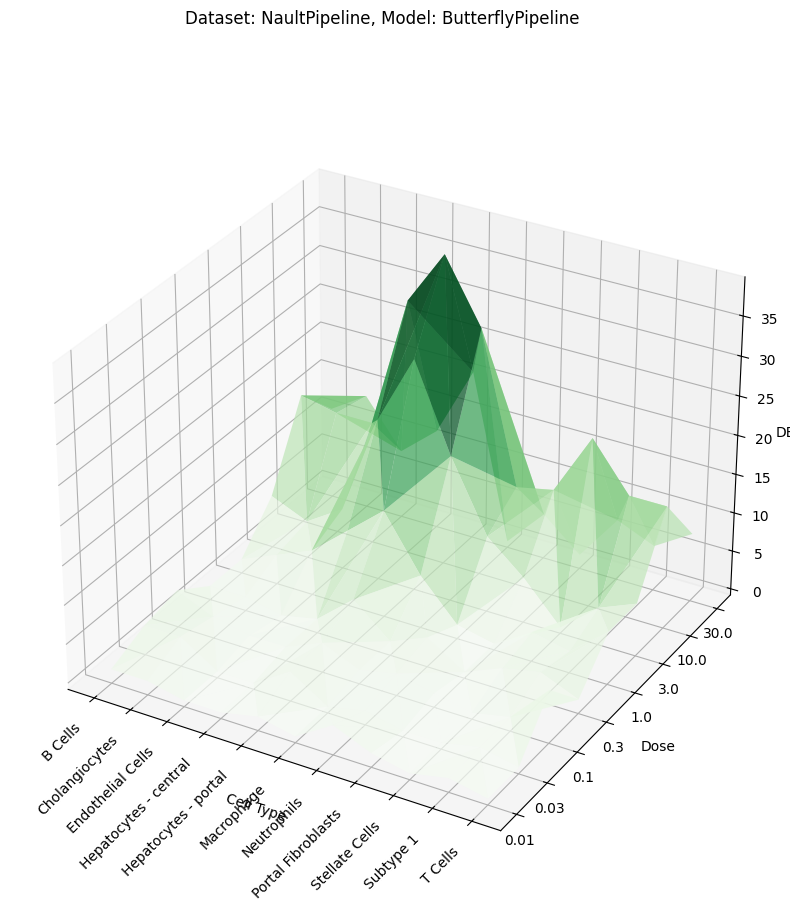

In [14]:
# 3d plot

import matplotlib.pyplot as plt
import numpy as np



def get_3d(metric, models=MODELS, dataset_name='NaultPipeline'):
    dataset = METRICS_DF[METRICS_DF['dataset'] == dataset_name].sort_values(by=['dose', 'cell_type_test'])
    x_labels = sorted(dataset['cell_type_test'].unique().tolist())
    y_labels = sorted(dataset['dose'].unique().tolist())
    
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')


    def per_model(model: str):
        dataset_model = dataset[dataset['model'] == model]
        x_numeric, _ = pd.factorize(dataset_model['cell_type_test'])
        y_numeric, _ = pd.factorize(dataset_model['dose'])
        ax.plot_trisurf(x_numeric, y_numeric, dataset_model[metric], cmap=color_maps[model], linewidth=0.1)


    for model in models:
        per_model(model)


    #Set axis labels and original tick labels
    ax.set_xlabel("Cell Type")
    ax.set_ylabel("Dose")
    ax.set_zlabel(metric)

    # Set original string labels on ticks
    ax.set_xticks(np.arange(len(x_labels)))
    ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=10)  # Rotate and adjust font size
    ax.set_yticks(np.arange(len(y_labels)))
    ax.set_yticklabels(y_labels, rotation=0, ha='right', fontsize=10)  # Rotate and adjust font size

    fig.suptitle('Dataset: NaultPipeline, Model: ButterflyPipeline')

    # Show plot
    plt.show()
    
get_3d('DEGs')
get_3d('r2mean')

for model in MODELS:
    get_3d('DEGs', [model])

## Contour across models

min 0 max 72


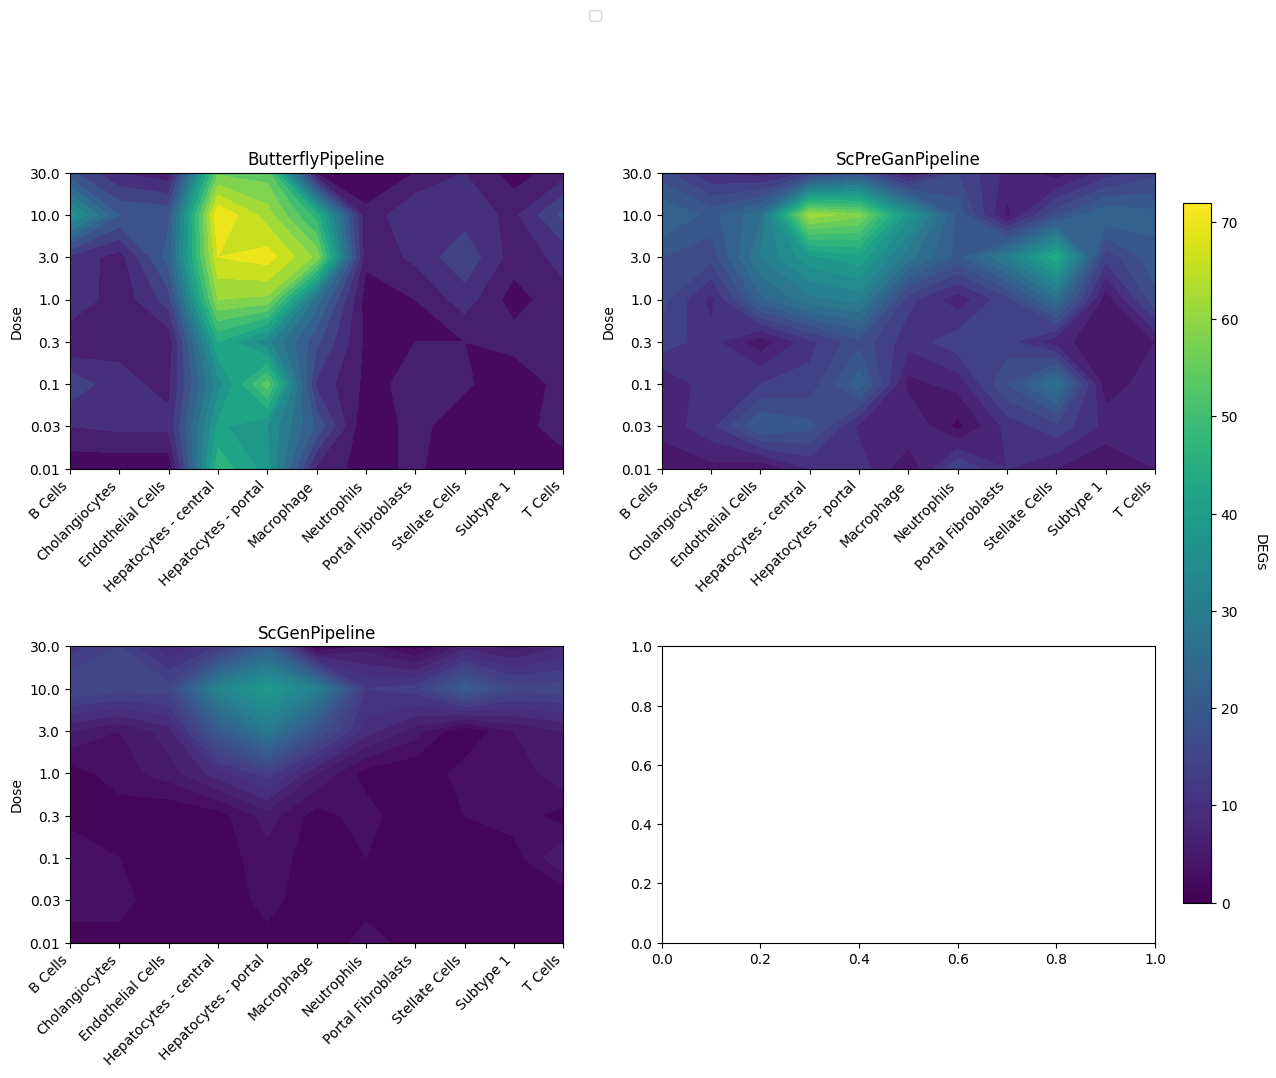

min 0.136 max 0.99


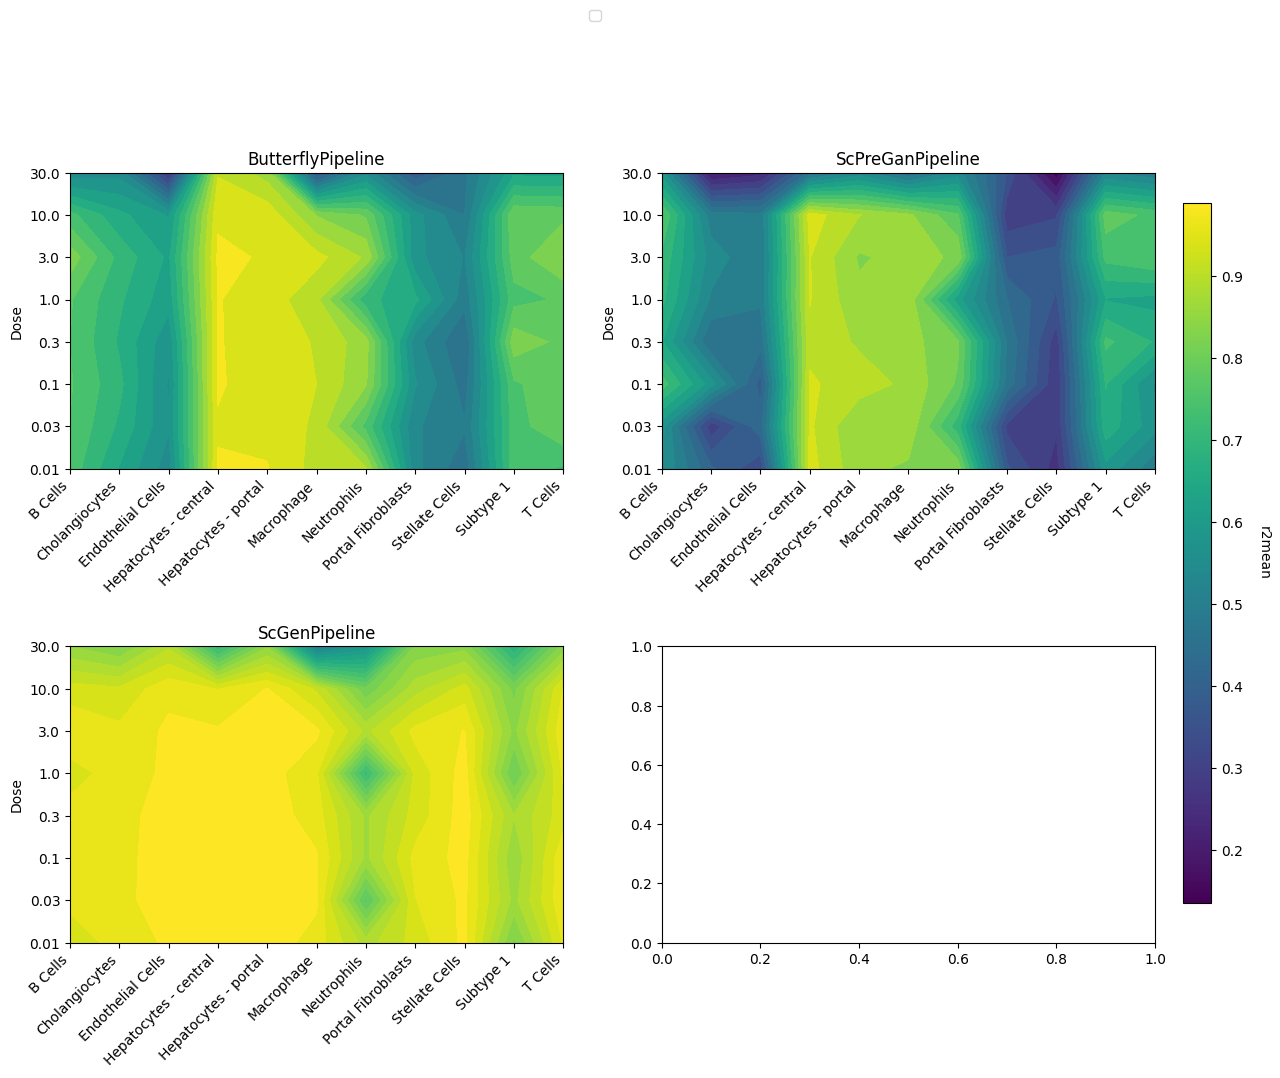

min 0.0004756637511496 max 0.9969289938009368


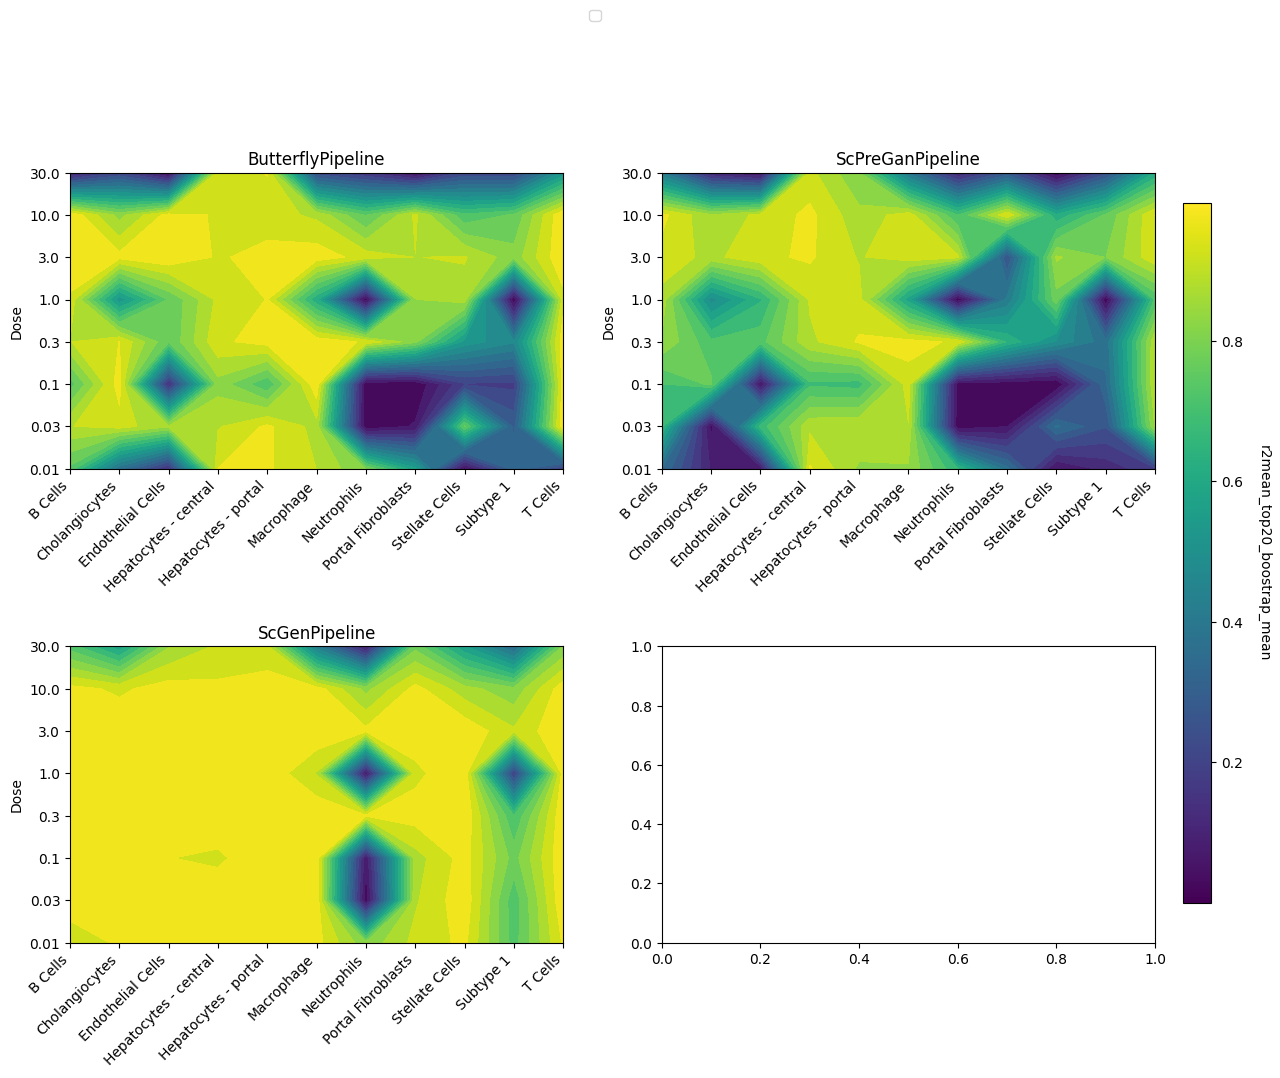

min 0.0018621288989767 max 0.9930801332535686


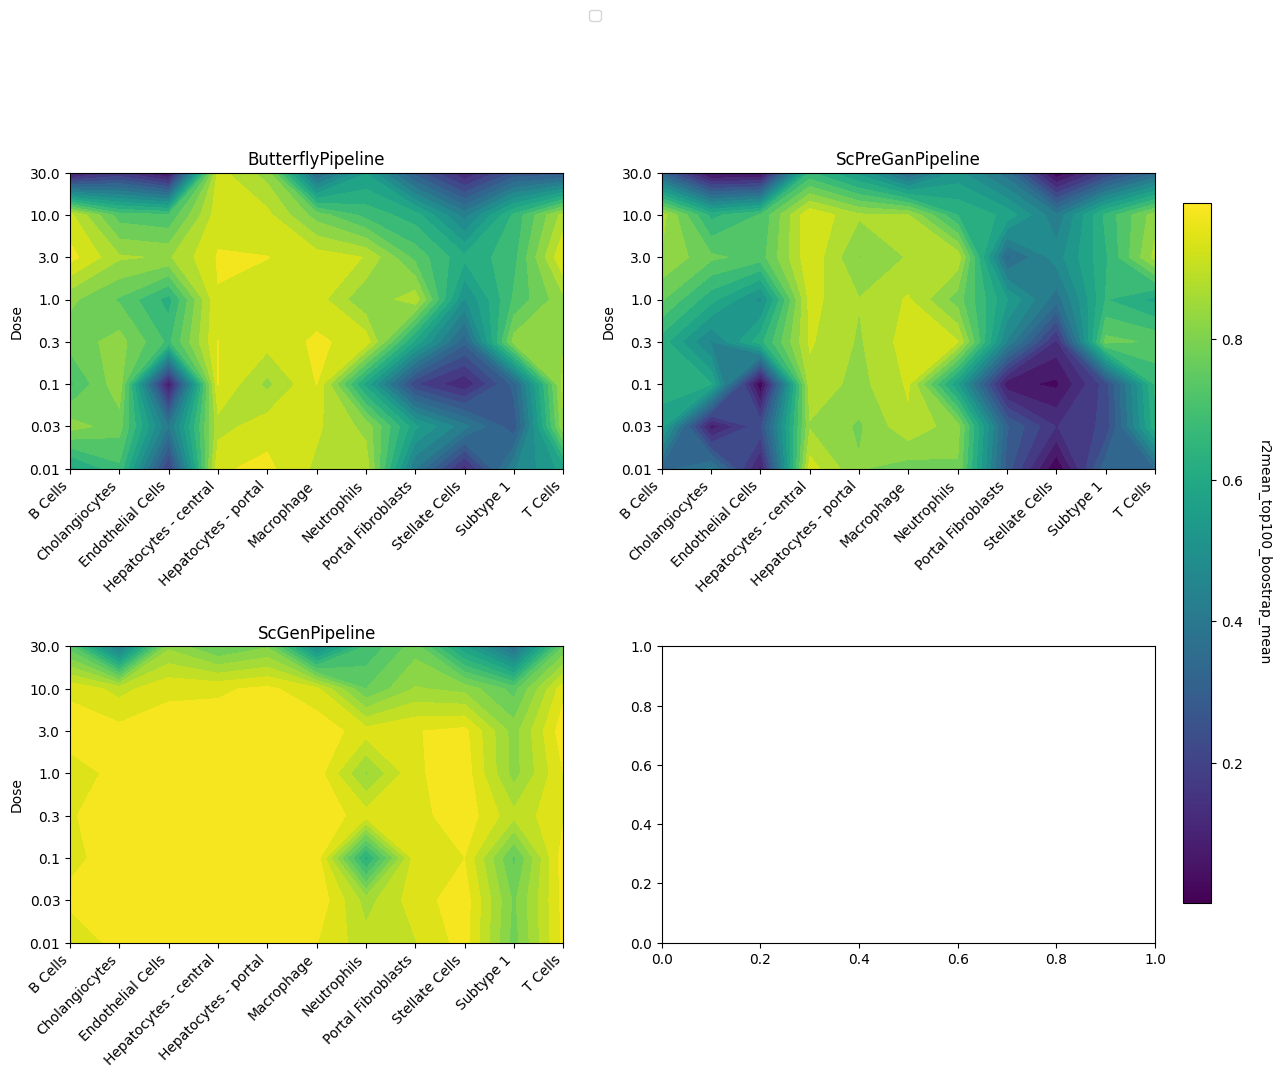

In [15]:
from matplotlib import colors

def get_contour(metric, models=MODELS, dataset_name='NaultPipeline'):
    dataset = METRICS_DF[METRICS_DF['dataset'] == dataset_name].sort_values(by=['dose', 'cell_type_test'])
    x_labels = sorted(dataset['cell_type_test'].unique().tolist())
    y_labels = sorted(dataset['dose'].unique().tolist())
        
    x = np.arange(len(x_labels))
    y = np.arange(len(y_labels))
    
    z_min = dataset[metric].min()
    z_max = dataset[metric].max()
    
    print("min", z_min, "max", z_max)

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()

    for i, model in enumerate(models):
        ax = axes[i]
        
        dataset_model  = dataset[dataset['model'] == model]
        
        Z = dataset_model.pivot_table(index='cell_type_test', columns='dose', values=metric).T.values

        X, Y = np.meshgrid(x, y)
        
        contour = ax.contourf(X, Y, Z, levels=20, cmap="viridis", vmin=z_min, vmax=z_max)
        #ax.colorbar(contour)
        
        ax.set_xticks(x)
        ax.set_xticklabels(x_labels, rotation=45, ha='right')
        ax.set_yticks(y)
        ax.set_ylabel('Dose')
        ax.set_yticklabels(y_labels, rotation=0, ha='right')
        ax.set_title(f"{model}")
    
    sm = cm.ScalarMappable(cmap="viridis", norm=colors.Normalize(vmin=z_min, vmax=z_max))
    sm.set_array([])  # Only needed for ScalarMappable
        
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
    colorbar = fig.colorbar(sm, cax=cbar_ax)
    colorbar.set_label(f'{metric}', rotation=270, labelpad=20)  # Add title with rotation

    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3)
    #fig.suptitle(f'Dataset {dataset_name} and metric {metric}')

    #fig.tight_layout(pad=2.0, h_pad=1.0, w_pad=1.0)
    plt.subplots_adjust(right=0.9, hspace=0.6, wspace=0.2)
    #plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
    
for metric in METRICS:
    get_contour(metric)

## 3d interactive

In [16]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np



def get_3d(metric, models=MODELS, dataset='NaultPipeline'):
    dataset = METRICS_DF[METRICS_DF['dataset'] == dataset].sort_values(by=['dose', 'cell_type_test'])
    x_labels = sorted(dataset['cell_type_test'].unique().tolist())
    y_labels = sorted(dataset['dose'].unique().tolist())

    
    # Initialize the 3D plot
    fig = go.Figure()

    def per_model(model: str):
        dataset_model = dataset[dataset['model'] == model]
        x_numeric, x_labels = pd.factorize(dataset_model['cell_type_test'])
        y_numeric, y_labels = pd.factorize(dataset_model['dose'])
        z_values = dataset_model[metric]
        

        # Add a 3D mesh for each model
        fig.add_trace(go.Mesh3d(
            x=x_numeric, 
            y=y_numeric, 
            z=z_values,
            # alphahull=6,
            colorbar_title=metric,
            colorscale=color_maps_no_transparent[model],
            intensity=z_values,
            name=model,
            opacity=0.7,
            showscale=False
        ))

    # Plot each model with its corresponding color map
    for model in MODELS:
        per_model(model)

    # Update layout with axis labels and tick text for categorical values
    fig.update_layout(
        scene=dict(
            xaxis=dict(
                title="",
                tickvals=np.arange(len(x_labels)),
                ticktext=x_labels,
                tickangle=45,
            ),
            yaxis=dict(
                title="Dose",
                tickvals=np.arange(len(y_labels)),
                ticktext=y_labels,
            ),
            zaxis=dict(title="DEGs"),
        ),
        title="Dataset: NaultPipeline, Models Comparison",
    )

    # Show plot
    fig.show()

get_3d('DEGs')
get_3d('r2mean')

## Violin plots for the most differentially expressed gene

In [17]:
# evaluation can return the eval data for subsequent analysis, we should get the latent space as well
# the reason to return the eval data is for comparison across models and datasets

## Compare scpregan and scpregan-reproducibility

In [18]:
from typing import Optional
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
from typing import List

from thesis import SAVED_RESULTS_PATH


def _plot_2d_metrics_scpregan(dataset: DataFrame, title: str, x_labels: List[str]):
    df_scpregan = dataset[dataset['model'] == 'ScPreGanPipeline']
    df_scpregan_repro = dataset[dataset['model'] == 'ScPreGanReproduciblePipeline']

    
    # Define unique cell types and bar positions
    x = np.arange(len(x_labels))  # Label locations
    width = 0.2  # Width of the bars for each model

    # List of metrics to plot
    metrics = ["DEGs", "r2mean", "r2mean_top20_boostrap_mean", "r2mean_top100_boostrap_mean"]

    # Create a 2x2 grid of subplots
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # Adjust size as needed
    axes = axes.flatten()  # Flatten to easily iterate over axes

    # Plot each metric on a different subplot
    for i, metric in enumerate(metrics):
        ax = axes[i]

        # Plot each model’s bars at slightly different x positions
        bar1 = ax.bar(x - width, df_scpregan[metric], width, label='ScPreGanPipeline', alpha=0.7)
        bar2 = ax.bar(x + width, df_scpregan_repro[metric], width, label='ScPreGanReproduciblePipeline', alpha=0.7)

        # Labeling and formatting
        ax.set_xticks(x)
        ax.set_xticklabels(x_labels, rotation=45, ha='right')
        ax.set_ylabel(metric)
        ax.set_title(f"Comparison of {metric}")

    # Set up a single legend by grabbing handles and labels from one of the subplots
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3)
    fig.suptitle(title)

    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space at the top for the legend
    plt.show()
    

def plot_2d_metrics_per_cell_type_scpregan(dataset_pipeline: str, title: str, dosage: Optional[float] = None, perturbation: Optional[str] = None):
    metrics_df = pd.read_csv(SAVED_RESULTS_PATH / "metrics2.csv")
    dataset = metrics_df[metrics_df['dataset'] == dataset_pipeline]
    if dosage is not None:
        dataset = dataset[dataset['dose'] == dosage]
    if perturbation is not None:
        dataset = dataset[dataset['perturbation'] == perturbation]
        
    cell_types = dataset['cell_type_test'].unique().tolist()
    _plot_2d_metrics_scpregan(dataset=dataset, title=title, x_labels=cell_types)


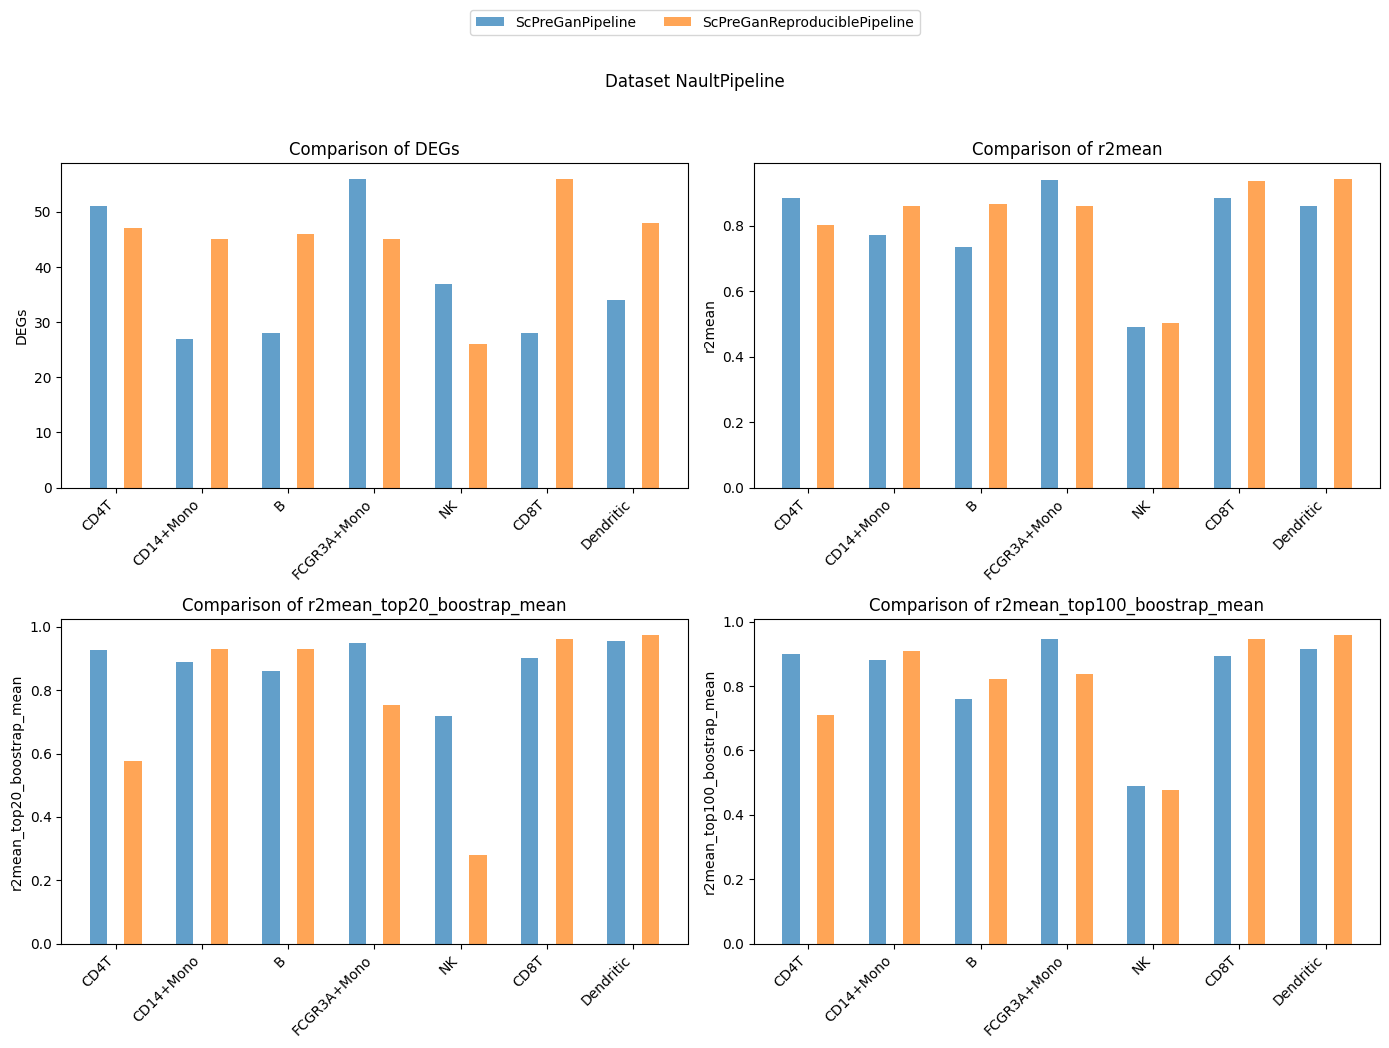

In [19]:
plot_2d_metrics_per_cell_type_scpregan(dataset_pipeline='PbmcPipeline', title='Dataset NaultPipeline')